This is just a notebook so that I can try out some things without breaking other notebooks

In [1]:
from DataAnalysisPlan import get_dict, clean_text, get_sentiment

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rudro/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/home/rudro/Code/SCP/DataAnalysisPlan.py:105: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 105 of the file /home/rudro/Code/SCP/DataAnalysisPlan.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  scp_soup = BeautifulSoup(html)


In [2]:
import pandas as pd

In [10]:
def scp_num(num):
    '''changes number to be readible by the scp wiki html
    Args:
        num (int or str): number
    Returns:
        n (str): number in format readible by scp wiki html (so 45 becomes 045)
    
    '''
    n = "000" + str(num)
    while len(n) > 4:
        n = n.replace("0", "", 1)
    if n[0] == "0":
        n = n.replace("0", "", 1)
    return(n)

In [4]:
# create dictionary for every possible scp, and add to dataframe
all_data = pd.DataFrame()

# create list of all scp numbers
# the first 99 numbers need to be changed to have 0 or 00 in front
num_list = []
for i in range(1, 100):
    num_list.append(scp_num(i))
num_list = num_list + (list(range(100, 8000)))

# loop through all the numbers, add to dataframe only if it was able to get the text
total = len(num_list)
for i in num_list:
    print(f"Looking at SCP #{i} out of {total}")
    try:
        scp_dict = get_dict(i)
        if all_data["Text"] != '':
            #scp_dict["Text"] = clean_text(scp_dict["Text"])
            all_data = all_data.append(scp_dict, ignore_index=True)
    except: 
        pass
all_data.head()

Looking at SCP #001 out of 7999
Looking at SCP #002 out of 7999


/home/rudro/Code/SCP/DataAnalysisPlan.py:105: GuessedAtParserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 105 of the file /home/rudro/Code/SCP/DataAnalysisPlan.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.




Looking at SCP #003 out of 7999
Looking at SCP #004 out of 7999
Looking at SCP #005 out of 7999
Looking at SCP #006 out of 7999
Looking at SCP #007 out of 7999
Looking at SCP #008 out of 7999
Looking at SCP #009 out of 7999
Looking at SCP #010 out of 7999
Looking at SCP #011 out of 7999
Looking at SCP #012 out of 7999
Looking at SCP #013 out of 7999
Looking at SCP #014 out of 7999
Looking at SCP #015 out of 7999
Looking at SCP #016 out of 7999
Looking at SCP #017 out of 7999
Looking at SCP #018 out of 7999
Looking at SCP #019 out of 7999
Looking at SCP #020 out of 7999
Looking at SCP #021 out of 7999
Looking at SCP #022 out of 7999
Looking at SCP #023 out of 7999
Looking at SCP #024 out of 7999
Looking at SCP #025 out of 7999
Looking at SCP #026 out of 7999
Looking at SCP #027 out of 7999
Looking at SCP #028 out of 7999
Looking at SCP #029 out of 7999
Looking at SCP #030 out of 7999
Looking at SCP #031 out of 7999
Looking at SCP #032 out of 7999
Looking at SCP #033 out of 7999
Looking 

Start here because the previous bit of code takes a horrific amount of time to run

In [1]:
import pandas as pd

In [2]:
scp_df = pd.read_csv("all_scps_final.csv")

In [3]:
scp_df.columns

Index(['Number', 'Tags', 'Sub-Objects', 'Pos Ratings', 'All Ratings',
       'Word Count', 'Safe', 'Euclid', 'Keter', 'Thaumiel', 'Anomalous',
       'Neutral', 'D-Class', 'Containment Breach', 'Addendum', 'Task Force',
       'O5 Council', 'Agent', '[EXPUNGED]', '[REDACTED]', 'Blacked Out'],
      dtype='object')

skip this too since it takes too long! (but run it for the last time)

# Text Things (added heading so it can be folded up)

In [5]:
scp_df["Text"] = scp_df["Text"].apply(clean_text)
scp_df

KeyboardInterrupt: 

In [6]:
all_scp_text = "\n".join(scp_df["Text"].values)

just as a warning, do not try to display all_scp_text because you'll be waiting for long enough to become an scp yourself...

In [ ]:
#all_scp_text

Idea for the tree - each "column" is just a binary variable for a word. The words will be decided on importance (roughly, how many times a word appears in a text but also not words that always appear in texts (TF-IDF)).

The random forest classifier can tell us which of those words are the most important.

In [7]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [75]:
vectorizer = TfidfVectorizer(max_features=500,stop_words='english')
vectorizer = vectorizer.fit(scp_df["Text"])

In [76]:
most_important_words = vectorizer.get_feature_names()
most_important_words

/home/rudro/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '30',
 'ability',
 'able',
 'access',
 'act',
 'action',
 'active',
 'activity',
 'actually',
 'addendum',
 'additional',
 'affect',
 'affected',
 'age',
 'agent',
 'air',
 'allow',
 'alpha',
 'alright',
 'amnestics',
 'analysis',
 'animal',
 'anomalous',
 'anomaly',
 'answer',
 'appear',
 'appearance',
 'approach',
 'approximately',
 'area',
 'arm',
 'ask',
 'assign',
 'attack',
 'attempt',
 'audio',
 'away',
 'base',
 'bear',
 'begin',
 'behavior',
 'believe',
 'best',
 'black',
 'blood',
 'body',
 'book',
 'box',
 'brain',
 'breach',
 'break',
 'bring',
 'building',
 'camera',
 'capable',
 'care',
 'carry',
 'case',
 'cause',
 'cease',
 'cell',
 'center',
 'chamber',
 'change',
 'child',
 'city',
 'civilian',
 'claim',
 'class',
 'clear',
 'clearance',
 'close',
 'come',
 'command',
 'communication',
 'complete',
 'c

In [10]:
import numpy as np

In [12]:
def convert_sentence_to_vector(sent : str):
  vec = []
  for word in most_important_words:
    if word in sent:
      vec.append(1)
    else:
      vec.append(0)
  return vec

In [41]:
convert_sentence_to_vector("this is an scp-1023 which does things like kill and also spookier things like mind control")

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

okay great, now we can convert scps to a list with a length of 350 

In [42]:
convert_sentence_to_vector(scp_df["Text"][10])

[0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0]

In [77]:
scp_df["Text"].apply(convert_sentence_to_vector)

0       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1       [1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, ...
2       [1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, ...
3       [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...
                              ...                        
5612    [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...
5613    [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, ...
5614    [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, ...
5615    [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, ...
5616    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
Name: Text, Length: 5617, dtype: object

In [78]:
scp_df["Vectors"] = scp_df["Text"].apply(convert_sentence_to_vector)

In [79]:
x = np.array(scp_df["Vectors"].tolist())
y = scp_df["Class"].values

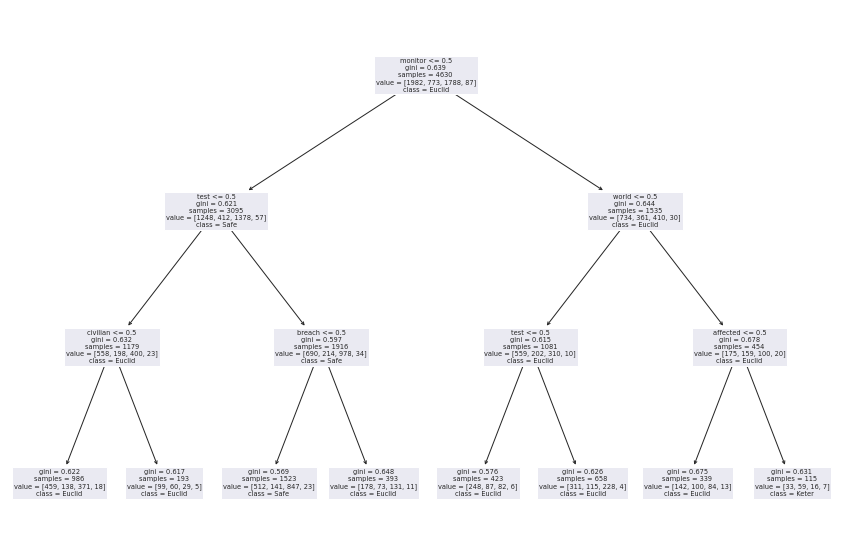

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np

# get rid of NA values
df_no_nan = scp_df.dropna(subset = ["Class"])
# drop all classes that aren't Euclid, Safe, Keter, or Thaumiel
classes_bool = (df_no_nan["Class"] == "Euclid") | (df_no_nan["Class"] == "Safe") | (df_no_nan["Class"] == "Keter")| (df_no_nan["Class"] == "Thaumiel")
df_classes = df_no_nan.loc[classes_bool, :]

# get x features
x_feat_list = most_important_words
# extract data from dataframe
x = np.array(df_classes.loc[:, "Vectors"].tolist())
y = df_classes.loc[:, "Class"].values

dec_tree_clf = tree.DecisionTreeClassifier(max_depth=3)

# fit data
dec_tree_clf = dec_tree_clf.fit(x, y)

# initialize empty figure (plot_tree sets text size to fill given figure
# if we resize figure afterwards text size remains too small)
plt.figure()
plt.gcf().set_size_inches(15, 10)

# 'plot' decision tree
tree.plot_tree(dec_tree_clf, 
               feature_names=x_feat_list,
               class_names=dec_tree_clf.classes_);

In [81]:
x = np.array(df_classes.loc[:, "Vectors"].tolist())
y = df_classes.loc[:, "Class"].values


In [54]:
df_classes

,Unnamed: 0,Number,Class,Pos Ratings,Pos Rating Rate,D-Class,Tags,Text,Sub-Objects,Word Count,Sentiment,Vectors
0,0,2,Euclid,1830.0,0.831063,0.0,"['alive', 'euclid', 'featured', 'scp', 'struct...",Item SCP-002 Object Class Euclid Special Conta...,NaN,857.0,NaN,"[0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, ..."
1,1,3,Euclid,823.0,0.780095,0.0,"['alive', 'biological', 'computer', 'director-...",Item SCP-003 Object Class Euclid Special Conta...,"['1', '2']",1789.0,NaN,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, ..."
2,2,4,Euclid,1151.0,0.860883,0.0,"['euclid', 'mind-affecting', 'portal', 'scp', ...",Item SCP-004 Object Class Euclid Special Conta...,"['1', '2', '7']",1452.0,NaN,"[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, ..."
3,3,5,Safe,709.0,0.559590,0.0,"['adaptive', 'safe', 'scp']",Item SCP-005 Object Class Safe Special Contain...,NaN,373.0,NaN,"[0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, ..."
4,4,6,Safe,686.0,0.566007,0.0,"['liquid', 'location', 'medical', 'rewrite', '...",Item SCP-006 Object Class Safe Special Contain...,NaN,491.0,NaN,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5611,5611,7985,Safe,30.0,0.937500,0.0,"['chemical', 'medical', 'mind-affecting', 'neu...",Item SCP-7985 Object Class Safe Special Contai...,['1'],1467.0,NaN,"[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ..."
5613,5613,7990,Safe,28.0,0.560000,1.0,"['dado', 'document', 'inscription', 'reality-b...",Item SCP-7990 Object Class Safe Special Contai...,['A'],1893.0,NaN,"[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, ..."
5614,5614,7991,Keter,78.0,1.000000,0.0,"['auditory', 'keter', 'mind-affecting', 'scp',...",Item SCP-7991 Object Class Keter Special Conta...,NaN,829.0,NaN,"[0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, ..."
5615,5615,7992,Euclid,147.0,0.973510,0.0,"['alive', 'animal', 'cognitohazard', 'euclid',...",Item SCP-7992 Object Class Euclid Special Cont...,NaN,1825.0,NaN,"[0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, ..."


In [55]:
x_feat_list = ["Pos Ratings", "Pos Rating Rate", "D-Class",  "Word Count"]

In [57]:
a = df_classes.loc[:, x_feat_list].values

In [58]:
b = np.array(df_classes.loc[:, "Vectors"].tolist())

In [64]:
x = np.concatenate([a,b],axis=1)

In [69]:
x = b

In [72]:
x.shape

(4630, 50)

In [82]:
from sklearn.model_selection import StratifiedKFold

# do a 10-fold cross-validation with max depth=3

n_splits = 10 # 10-fold Cross Validation
max_depth = 8

# initialize k fold
skfold = StratifiedKFold(n_splits=n_splits)

# initialize decision tree
dec_tree_clf = tree.DecisionTreeClassifier(max_depth=max_depth)

# initialize y_pred, stores predictions of y
y_pred = np.empty_like(y)

for train_idx, test_idx in skfold.split(x, y):
    # get training data
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    
    # get test data    
    x_test = x[test_idx, :]
    
    # fit data
    dec_tree_clf = dec_tree_clf.fit(x_train, y_train)
    
    # estimate on test data
    y_pred[test_idx] = dec_tree_clf.predict(x_test)

0.45161987041036716

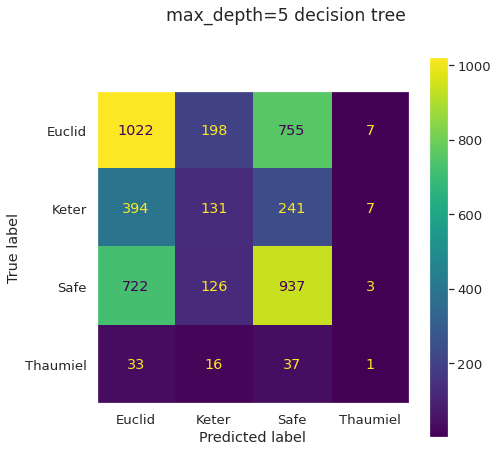

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)

conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y))

sns.set(font_scale=1.2)
conf_mat_disp.plot()
plt.gcf().set_size_inches(7, 7)
plt.grid(False)
plt.suptitle('max_depth=5 decision tree')

from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

Why is this project important at all?

it's probably not but we'll justify it because it's fun

# Tree things (no text)